
Exploratory Data Analysis (EDA)

1. Load the smartphones dataset

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [24]:
Smartphones_data = pd.read_csv("C:/Users/himan/Downloads/archive/Smartphones_cleaned_dataset.csv")

In [25]:
Smartphones_data.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


2. Checking data summary and missing values

In [26]:
# Dataset overview

print("Shape of the dataset:", Smartphones_data.shape)

print("\nColumns in the dataset:\n", Smartphones_data.columns)


# Check for missing values

print("\nMissing values in each column:\n", Smartphones_data.isnull().sum())


# Data types and summary statistics

print("\nData types:\n", Smartphones_data.dtypes)

print("\nSummary Statistics:\n", Smartphones_data.describe(include='all'))

Shape of the dataset: (980, 26)

Columns in the dataset:
 Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

Missing values in each column:
 brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        

In [27]:
# check missing values

print("\nMissing values in each column:\n", Smartphones_data.isnull().sum())

print("\nPercentage of missing values in each column:\n", (Smartphones_data.isnull().sum()/len(Smartphones_data))*100)


Missing values in each column:
 brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

Percentage of missing values in each column:
 brand_name                    0.000000
model     

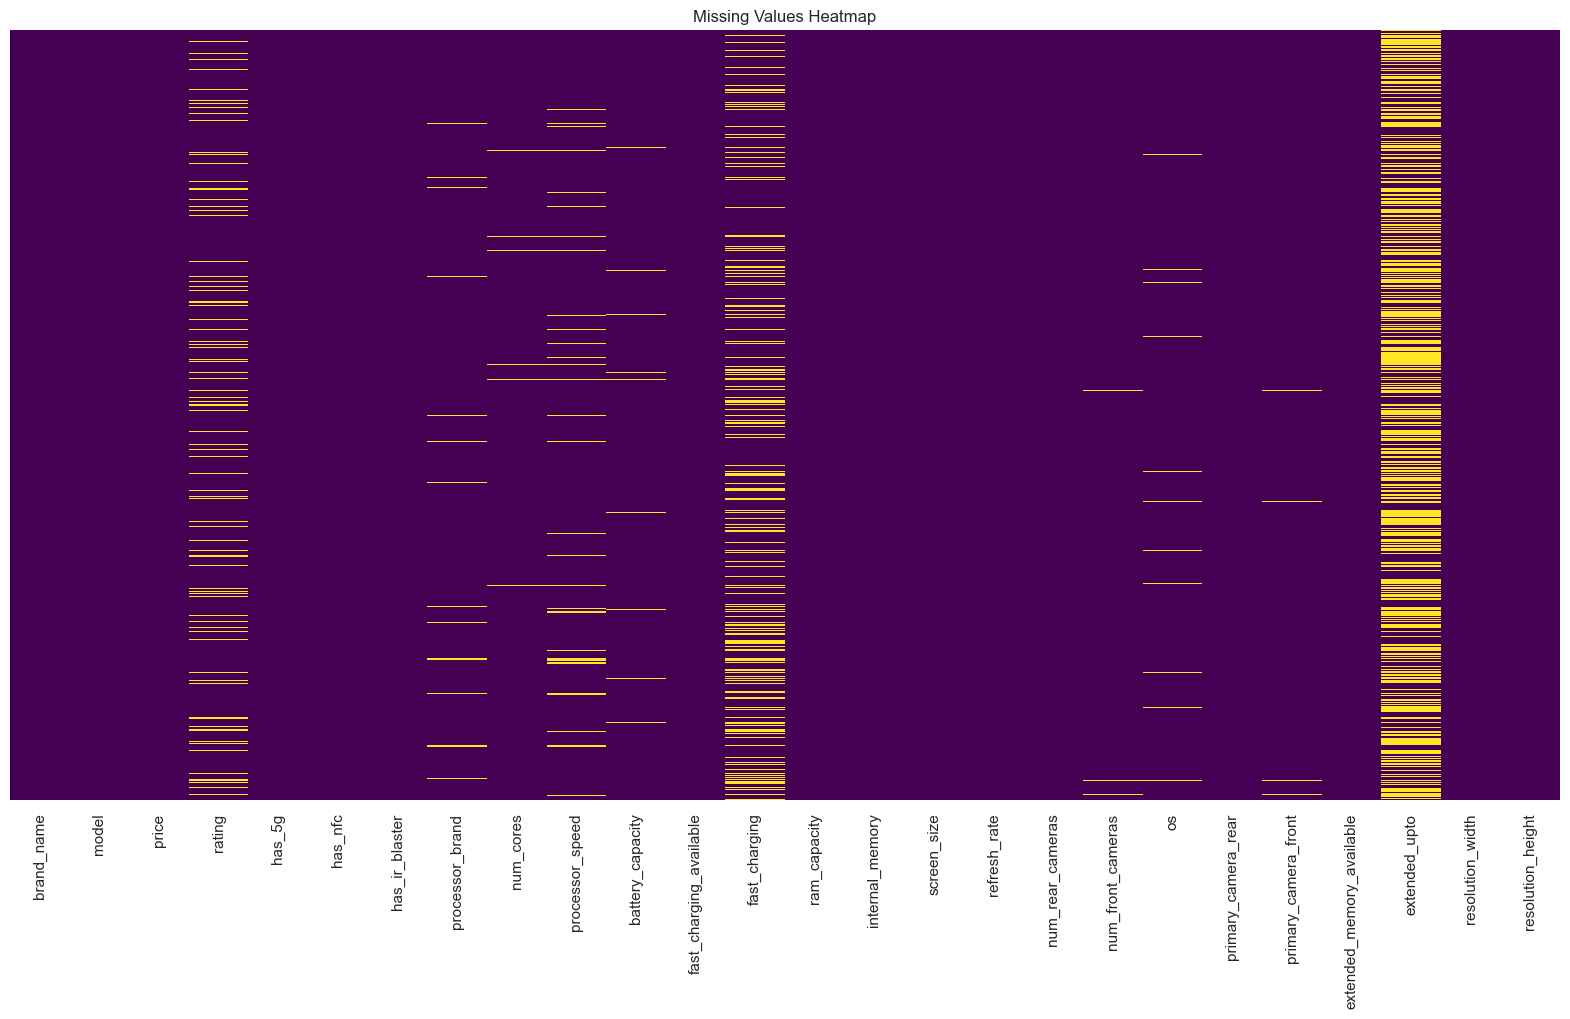

In [28]:
# Create the heatmap 
 
plt.figure(figsize=(20, 10)) 

sns.heatmap(Smartphones_data.isnull(), cbar=False,cmap='viridis', yticklabels=False)

plt.title('Missing Values Heatmap')

plt.show()

Impute missing values

In [29]:
# fill missing value with machine learning algo

# Import necessary libraries

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor


# Create a copy to avoid modifying the original DataFrame

Smartphones_dataset = Smartphones_data.copy()



# Separate numerical and categorical columns

numerical_cols = Smartphones_dataset.select_dtypes(include=['number']).columns
categorical_cols = Smartphones_dataset.select_dtypes(exclude=['number']).columns


# Use IterativeImputer for numerical features

imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
Smartphones_dataset[numerical_cols] = imputer_num.fit_transform(Smartphones_dataset[numerical_cols])

# Fill categorical features with the mode (most frequent value)

for col in categorical_cols:

    Smartphones_dataset[col] = Smartphones_dataset[col].fillna(Smartphones_dataset[col].mode()[0])



# Verify if there are any missing values left

print("\nMissing values after imputation:\n", Smartphones_dataset.isnull().sum())


Missing values after imputation:
 brand_name                   0
model                        0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
extended_upto                0
resolution_width             0
resolution_height            0
dtype: int64


3. Univariate Analysis

Explore individual variables (extended_memory_available, num_rear_cameras, processor_speed, has_5g).


Extended memory:
 extended_memory_available
1.0    618
0.0    362
Name: count, dtype: int64


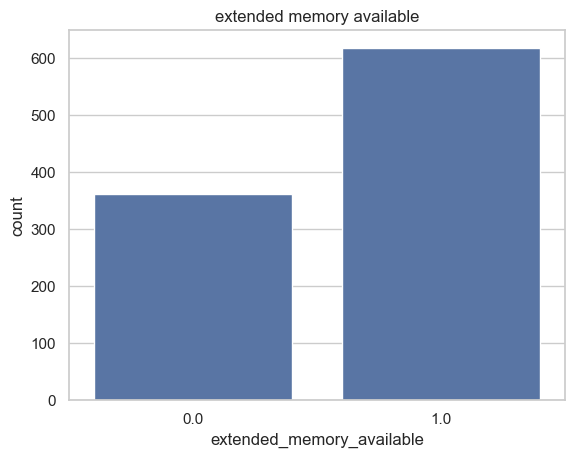


num_rear_cameras:
 num_rear_cameras
3.0    551
2.0    208
4.0    156
1.0     65
Name: count, dtype: int64


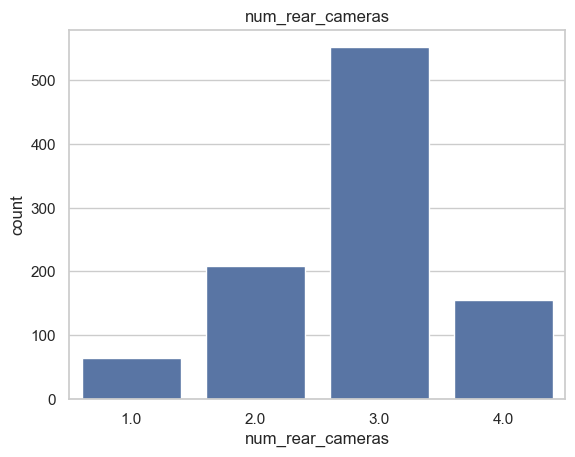


processor_speed:
 count    980.000000
mean       2.438695
std        0.467876
min        1.200000
25%        2.050000
50%        2.360000
75%        2.850000
max        3.220000
Name: processor_speed, dtype: float64


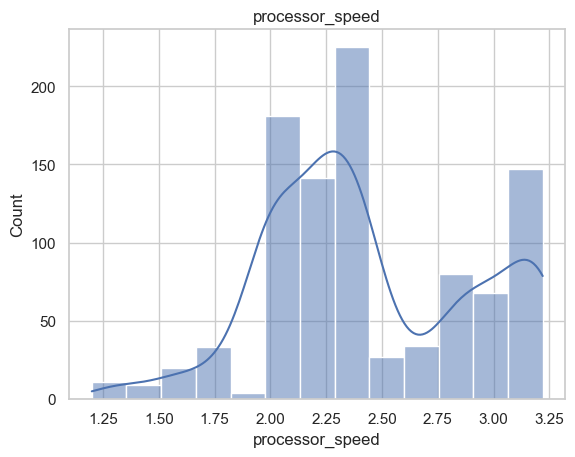


has_5g:
 has_5g
True     549
False    431
Name: count, dtype: int64


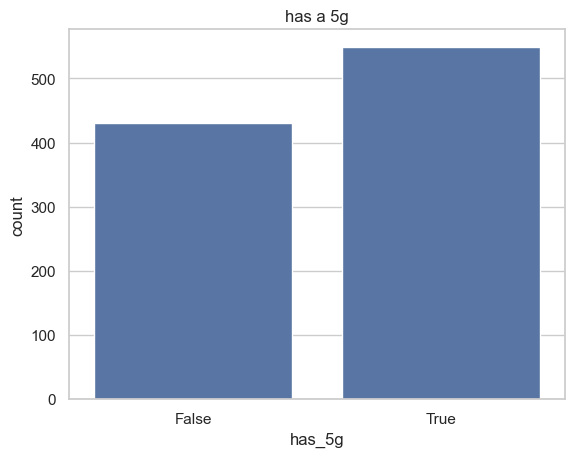

In [30]:
# Analyze 'Extended memory available'

print("\nExtended memory:\n", Smartphones_dataset['extended_memory_available'].value_counts())

sns.countplot(x='extended_memory_available', data=Smartphones_dataset)

plt.title('extended memory available')

plt.show()


# Analyze 'num_rear_cameras'

print("\nnum_rear_cameras:\n", Smartphones_dataset['num_rear_cameras'].value_counts())

sns.countplot(x='num_rear_cameras', data=Smartphones_dataset)

plt.title('num_rear_cameras')

plt.show()


# Analyze 'processor_speed'

print("\nprocessor_speed:\n", Smartphones_dataset['processor_speed'].describe())

sns.histplot(x='processor_speed', data=Smartphones_dataset, kde=True)

plt.title('processor_speed')

plt.show()


# Analyze 'has_5g'

print("\nhas_5g:\n", Smartphones_dataset['has_5g'].value_counts())

sns.countplot(x='has_5g', data=Smartphones_dataset)

plt.title('has a 5g')

plt.show()

4. Bivariate Analysis

Explore has_5g with nfc, rear_cameras, extended_memory.


has_5g with nfc:
 has_nfc  has_5g
False    False     373
         True      214
True     True      335
         False      58
Name: count, dtype: int64


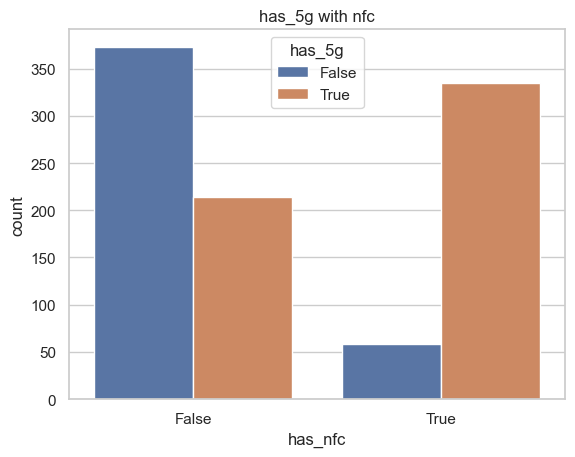


5g based on cameras:
 num_rear_cameras  has_5g
1.0               False      60
                  True        5
2.0               False     120
                  True       88
3.0               True      382
                  False     169
4.0               False      82
                  True       74
Name: count, dtype: int64


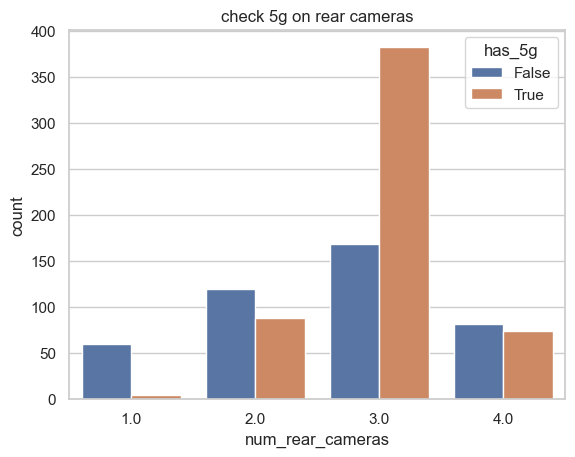


Has_5g with extended_memory_available:
 extended_memory_available  has_5g
0.0                        True      322
                           False      40
1.0                        False     391
                           True      227
Name: count, dtype: int64


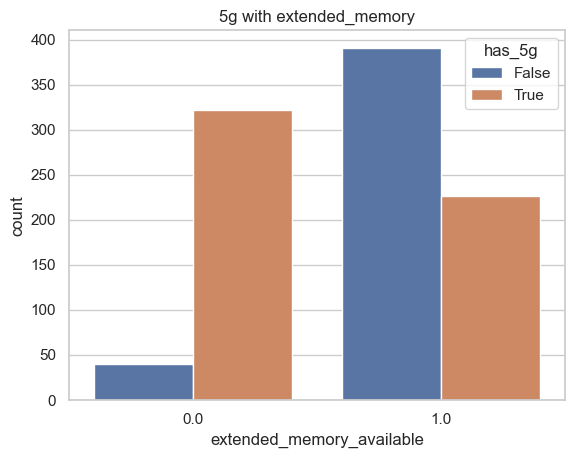

In [31]:
# Analyze has_5d with  nfc

print("\nhas_5g with nfc:\n", Smartphones_dataset.groupby('has_nfc')['has_5g'].value_counts())

sns.countplot(x='has_nfc',hue='has_5g' ,data=Smartphones_dataset)

plt.title('has_5g with nfc')

plt.show()


# Analyze 5g based with num_rear_cameras

print("\n5g based on cameras:\n", Smartphones_dataset.groupby('num_rear_cameras')['has_5g'].value_counts())

sns.countplot(x='num_rear_cameras', hue='has_5g', data=Smartphones_dataset)

plt.title('check 5g on rear cameras')

plt.show()


# Analyze has_5g based on extended memory available

print("\nHas_5g with extended_memory_available:\n", Smartphones_dataset.groupby('extended_memory_available')['has_5g'].value_counts())

sns.countplot(x='extended_memory_available', hue='has_5g', data=Smartphones_dataset)

plt.title('5g with extended_memory')

plt.show()



5. Insights from Analysis
Findings

nfc: There are more phones with 5G but no NFC (214) than phones with NFC but no 5G (58), indicating 5G is becoming more common even in budget segments.

rear_cameras: 5G availability increases with the number of rear cameras, peaking at 3. This suggests that brands are using a combination of camera complexity and network support to define mid-range and premium segments.

extended_memory_available: There is a clear trend: Newer 5G phones are moving away from expandable storage, aligning with industry shifts toward higher internal storage capacities and slimmer designs.

6. 5g analysis

We’ll analyze how 5g depends on specific features, such as:

rating.

processor_brand.

battery_capacity.

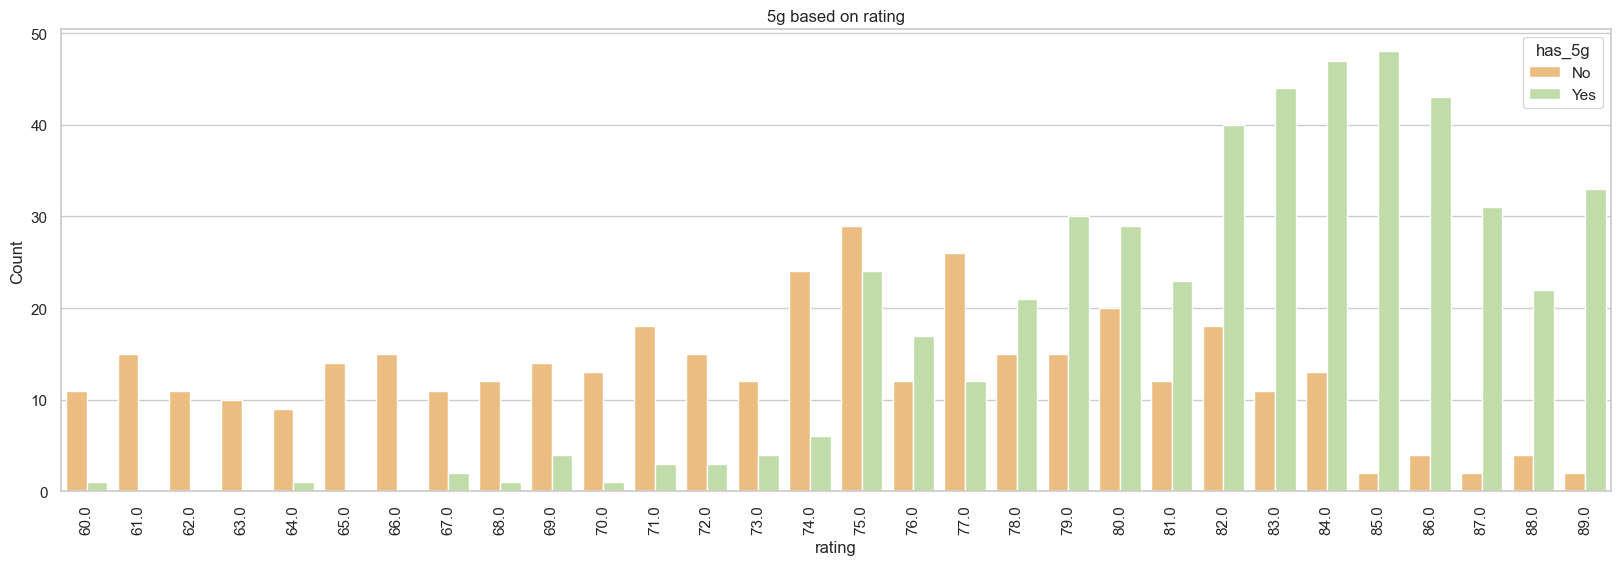

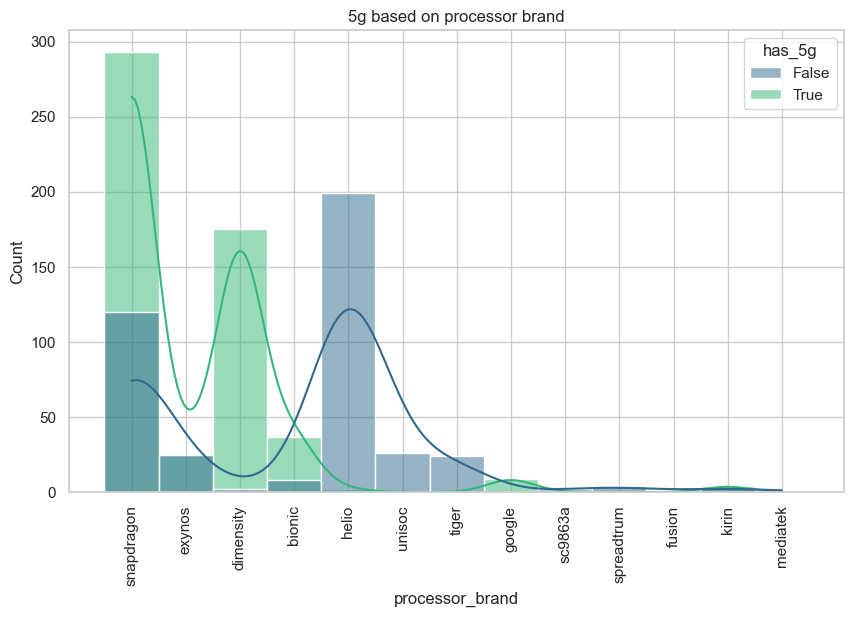

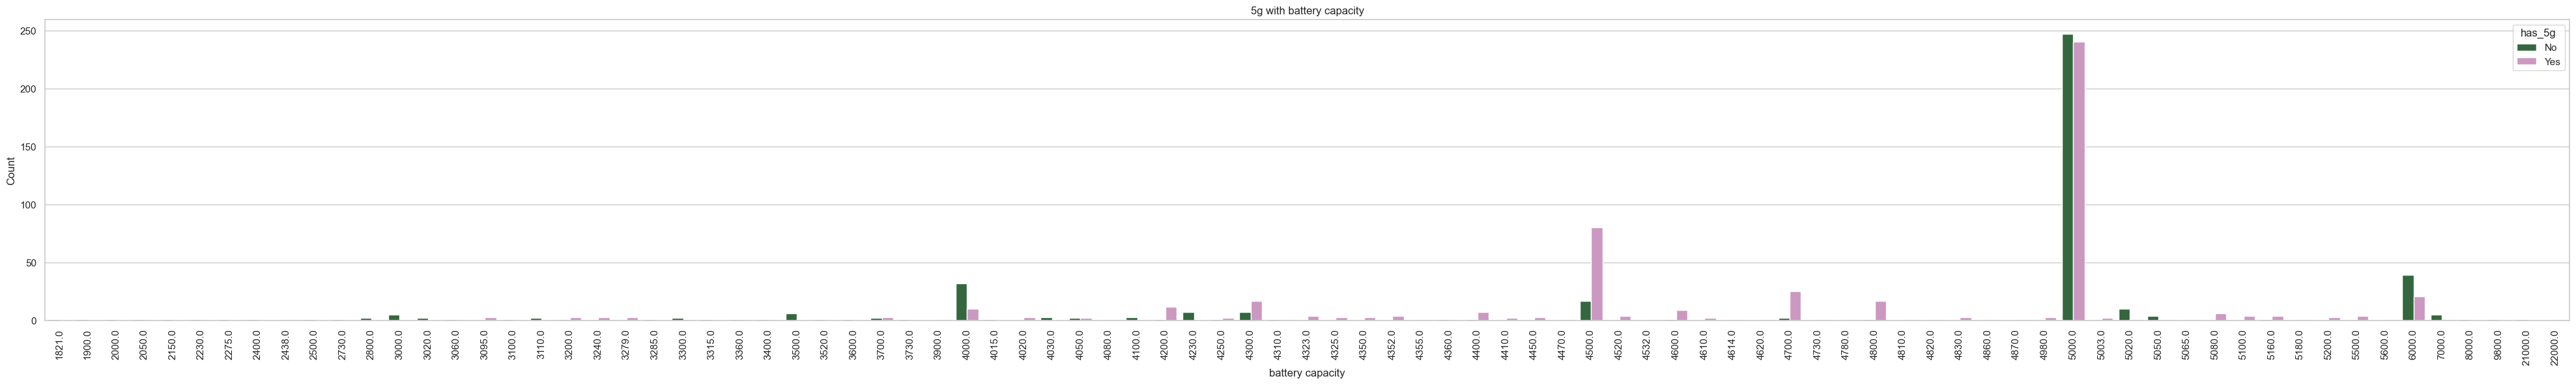

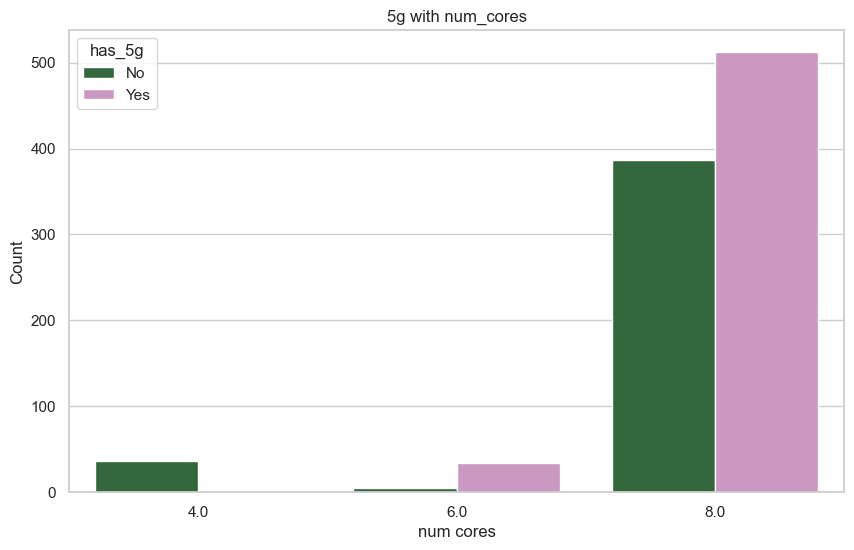

In [32]:
# 5g based on rating

plt.figure(figsize=(20, 6))
sns.countplot(x='rating', hue='has_5g', data=Smartphones_data, palette='Spectral')
plt.title('5g based on rating')
plt.xlabel('rating')
plt.ylabel('Count')
plt.legend(title='has_5g', labels=['No', 'Yes'])
plt.xticks(rotation=90)  
plt.show()


# 5g based on processor_brand

plt.figure(figsize=(10, 6))
sns.histplot(Smartphones_data, x='processor_brand', hue='has_5g', bins=20, kde=True, palette='viridis')
plt.title('5g based on processor brand')
plt.xlabel('processor_brand')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()


# 5g with battery capacity

plt.figure(figsize=(50, 6))
sns.countplot(x='battery_capacity', hue='has_5g', data=Smartphones_data, palette='cubehelix')
plt.title('5g with battery capacity')
plt.xlabel('battery capacity')
plt.ylabel('Count')
plt.legend(title='has_5g', labels=['No', 'Yes'])
plt.xticks(rotation=90)
plt.show()


# 5g with num_cores

plt.figure(figsize=(10, 6))
sns.countplot(x='num_cores', hue='has_5g', data=Smartphones_data, palette='cubehelix')
plt.title('5g with num_cores')
plt.xlabel('num cores')
plt.ylabel('Count')
plt.legend(title='has_5g', labels=['No', 'Yes'])
plt.show()


7. Feature Engineering

In [33]:
#  adding feature engineering columns 
Smartphones_data['fast_charging'] = Smartphones_data['fast_charging'].fillna(1)
Smartphones_data['extended_upto'] = Smartphones_data['extended_upto'].fillna(0)
Smartphones_data['num_cores'] = Smartphones_data['num_cores'].fillna(Smartphones_data['num_cores'].median())
Smartphones_data['processor_speed'] = Smartphones_data['processor_speed'].fillna(Smartphones_data['processor_speed'].median())
Smartphones_data['battery_capacity'] = Smartphones_data['battery_capacity'].fillna(Smartphones_data['battery_capacity'].median())
Smartphones_data['primary_camera_front'] = Smartphones_data['primary_camera_front'].fillna(Smartphones_data['primary_camera_front'].median())
Smartphones_data['num_front_cameras'] = Smartphones_data['num_front_cameras'].fillna(Smartphones_data['num_front_cameras'].median())

Smartphones_data['price_range'] = pd.cut(Smartphones_data['price'], bins=[0, 15000, 30000, 50000, 100000],
                                         labels=['Budget', 'Midrange', 'Premium', 'Ultra Premium'])
Smartphones_data['performance_score'] = Smartphones_data['num_cores'] * Smartphones_data['processor_speed']
Smartphones_data['total_camera_mp'] = Smartphones_data['primary_camera_rear'] + Smartphones_data['primary_camera_front']
Smartphones_data['total_cameras'] = Smartphones_data['num_rear_cameras'] + Smartphones_data['num_front_cameras']
Smartphones_data['charging_efficiency'] = Smartphones_data['battery_capacity'] / Smartphones_data['fast_charging']
Smartphones_data['ppi'] = np.sqrt(Smartphones_data['resolution_width']**2 + Smartphones_data['resolution_height']**2) / Smartphones_data['screen_size']
Smartphones_data['total_memory_with_extended'] = Smartphones_data['internal_memory'] + Smartphones_data['extended_upto']
Smartphones_data['is_large_battery'] = Smartphones_data['battery_capacity'] > 4500
Smartphones_data['is_high_refresh_display'] = Smartphones_data['refresh_rate'] >= 120
Smartphones_data['ram_category'] = pd.cut(Smartphones_data['ram_capacity'], bins=[0, 4, 8, 12, 20],
                                          labels=['Low RAM', 'Mid RAM', 'High RAM', 'Ultra RAM'])


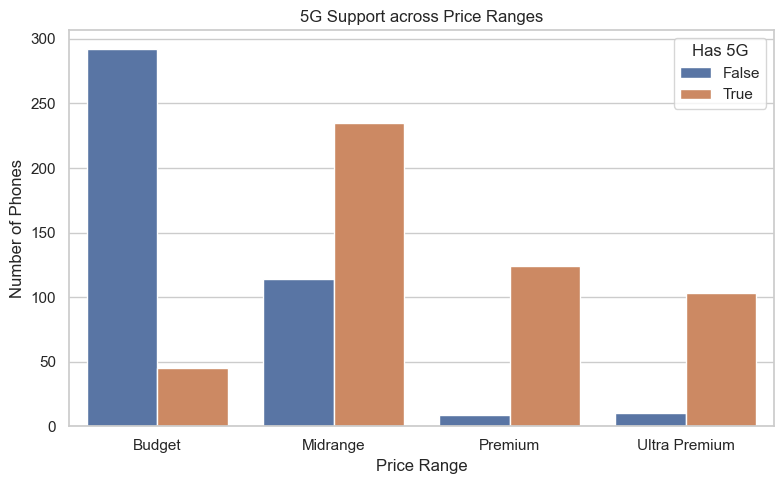

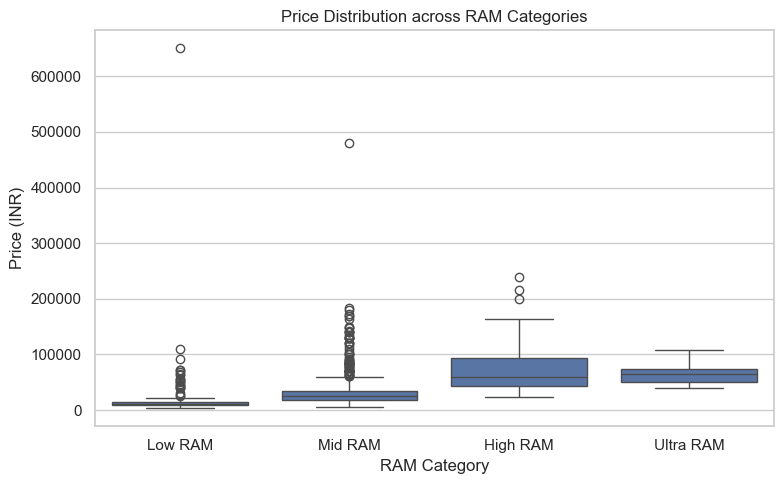

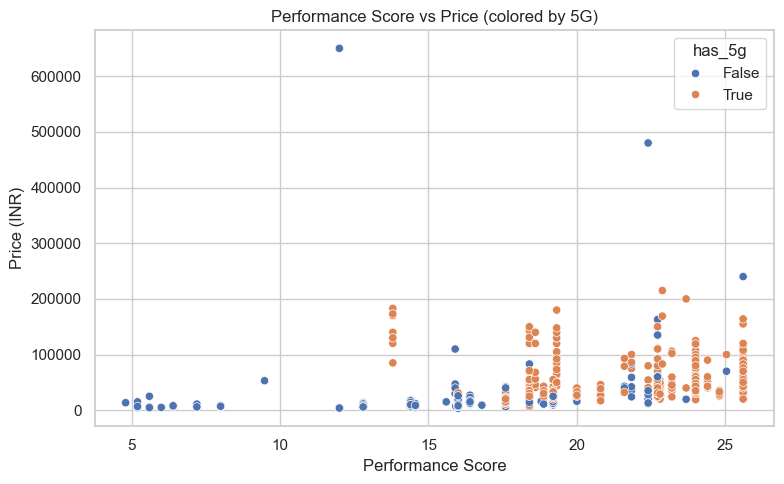

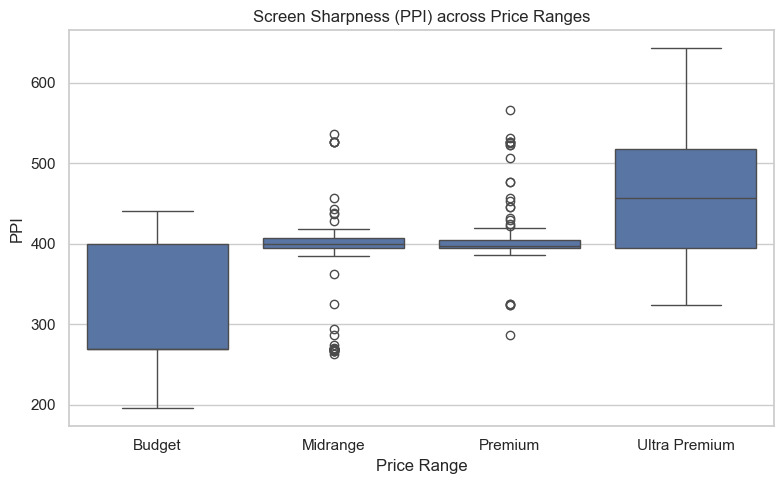

In [34]:
# Visualizations 

# 1. 5G Support by Price Range
plt.figure(figsize=(8, 5))
sns.countplot(data=Smartphones_data, x='price_range', hue='has_5g')
plt.title('5G Support across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Phones')
plt.legend(title='Has 5G')
plt.tight_layout()
plt.show()

# 2. RAM Category vs Price Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(data=Smartphones_data, x='ram_category', y='price')
plt.title('Price Distribution across RAM Categories')
plt.xlabel('RAM Category')
plt.ylabel('Price (INR)')
plt.tight_layout()
plt.show()

# 3. Performance Score vs Price (colored by 5G)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=Smartphones_data, x='performance_score', y='price', hue='has_5g')
plt.title('Performance Score vs Price (colored by 5G)')
plt.xlabel('Performance Score')
plt.ylabel('Price (INR)')
plt.tight_layout()
plt.show()

# 4. PPI vs Price Range
plt.figure(figsize=(8, 5))
sns.boxplot(data=Smartphones_data, x='price_range', y='ppi')
plt.title('Screen Sharpness (PPI) across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('PPI')
plt.tight_layout()
plt.show()



8. Advanced Visualization (Heatmap)

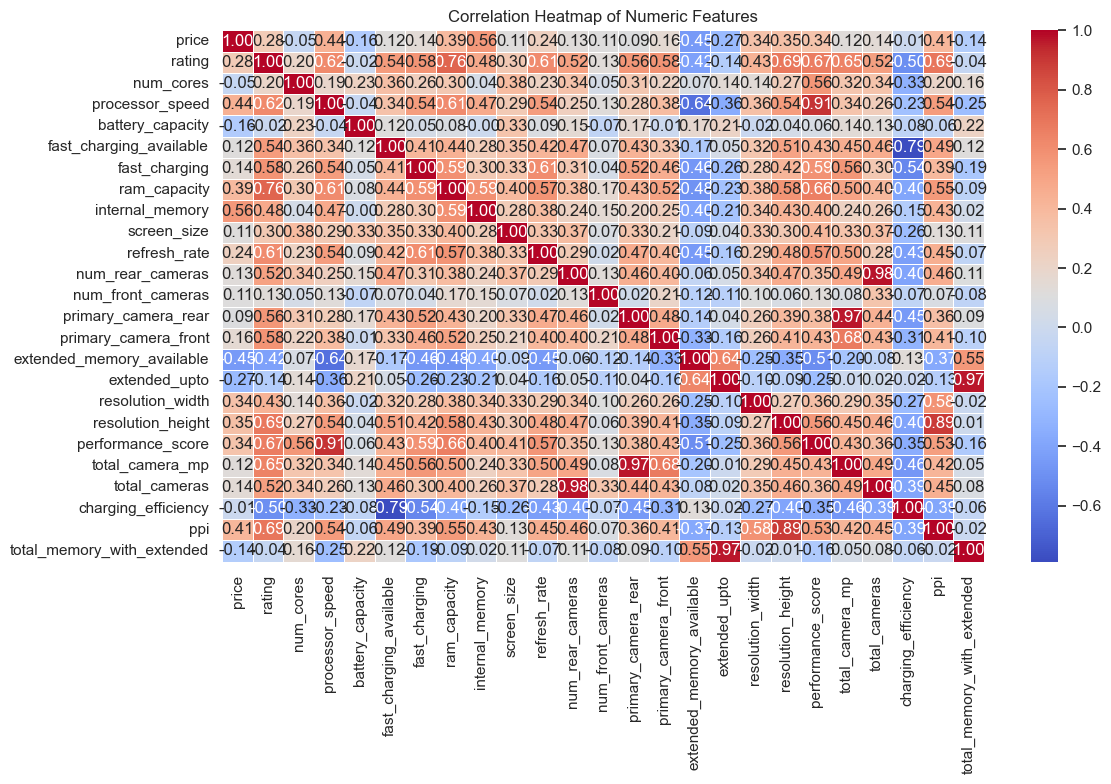

In [35]:
 # Heatmap: Correlation between numerical features
plt.figure(figsize=(12, 8))
corr = Smartphones_data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()